# Download tweets

In [1]:
# import module
import tweepy
import pandas as pd

In [ ]:
from credentials import *
auth = tweepy.OAuth2BearerHandler(bearer_token)
api = tweepy.API(auth)

In [ ]:
search_term = '#Ukraine'
nr_tweets = 500

list_tweets = []

tweets = tweepy.Cursor(api.search_tweets , 
            q= search_term , lang="en" ).items(nr_tweets)

for tweet in tweets:
    list_tweets.append(tweet)

## Create TSV file with data about tweets

In [ ]:
import re

#write the csv
with open(f'tweets.tsv', 'w') as f:
    

    f.write("id\tcreated_at\tretweets\tlikes\ttext\tlanguage\tuser_mentions\n")
    for tweet in list_tweets:
        users_mentions = len(tweet.entities['user_mentions']) 
        tweet.text = re.sub( r'\n+' , ' ' , tweet.text )
        tweet.text = re.sub( r',' , '' , tweet.text )
        f.write( f'{tweet.id_str}\t{tweet.created_at}\t{tweet.retweet_count}\t{tweet.favorite_count}\t{tweet.text}\t{tweet.lang}\t{users_mentions}\n' )

## Create CSV file with hash tags

In [ ]:
import re

all_hash_tags = dict()
all_user_mentions = dict()

for tweet in list_tweets:
    hash_tags = tweet.entities['hashtags']
    for tag in hash_tags:
        all_hash_tags[tag['text']] = all_hash_tags.get(tag['text'],0)+1
    
    users = tweet.entities['user_mentions']
    for user in users:
        all_user_mentions[user['screen_name']] = all_hash_tags.get(user['screen_name'],0)+1

hash_tags = all_hash_tags.copy()
        
print(len(all_hash_tags))
for tag in all_hash_tags:
    if not all_hash_tags[tag] > 5:
        del hash_tags[tag]

del hash_tags['Ukraine']


#write the csv
with open(f'hash_tags.csv', 'w') as f:

    f.write("hash_tag,count\n")
    for tag in hash_tags:
        f.write( f'{tag},{hash_tags[tag]}\n' )


## Read TSV file using Pandas

The [`dt.floor()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.floor.html) method 'rounds off' the timestamp to the highest value below the current value. The code 'S' performs this 'flooring' action at the level of the second. You can also use [many other codes](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases). 

In teh code below, the result of the `groupby` mention is assigned to a `Series` named 'tps' ('tweets per second')


In [18]:
df = pd.read_csv('tweets.tsv' , sep = '\t')
df['datetime'] = pd.to_datetime(df['created_at']).dt.floor('S')

tps = df.groupby('datetime').count().reset_index()


In [19]:
tps

,datetime,id,created_at,retweets,likes,text,language,user_mentions
0,2022-03-17 22:48:26+00:00,7,7,7,7,7,7,7
1,2022-03-17 22:48:27+00:00,5,5,5,5,5,5,5
2,2022-03-17 22:48:28+00:00,6,6,6,6,6,6,6
3,2022-03-17 22:48:29+00:00,9,9,9,9,9,9,9
4,2022-03-17 22:48:30+00:00,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
124,2022-03-17 22:50:34+00:00,7,7,7,7,7,7,7
125,2022-03-17 22:50:35+00:00,6,6,6,6,6,6,6
126,2022-03-17 22:50:36+00:00,3,3,3,3,3,3,3
127,2022-03-17 22:50:37+00:00,3,3,3,3,3,3,3


## Read the hash tags CSV

In [3]:
df2 = pd.read_csv('hash_tags.csv')
df2 = df2.sort_values('count' , ascending = False)

# Exercises

## Exercise 1

Create a bar chart to show the frequencies of the hash tags

* Title: ‘#Ukraine’
* X-axis label: ‘Hash tag’
* Y-axis label: ‘Frequency’
* Colour: ‘#a8325e’
* Change rotation of X-axis labels with 80 degrees




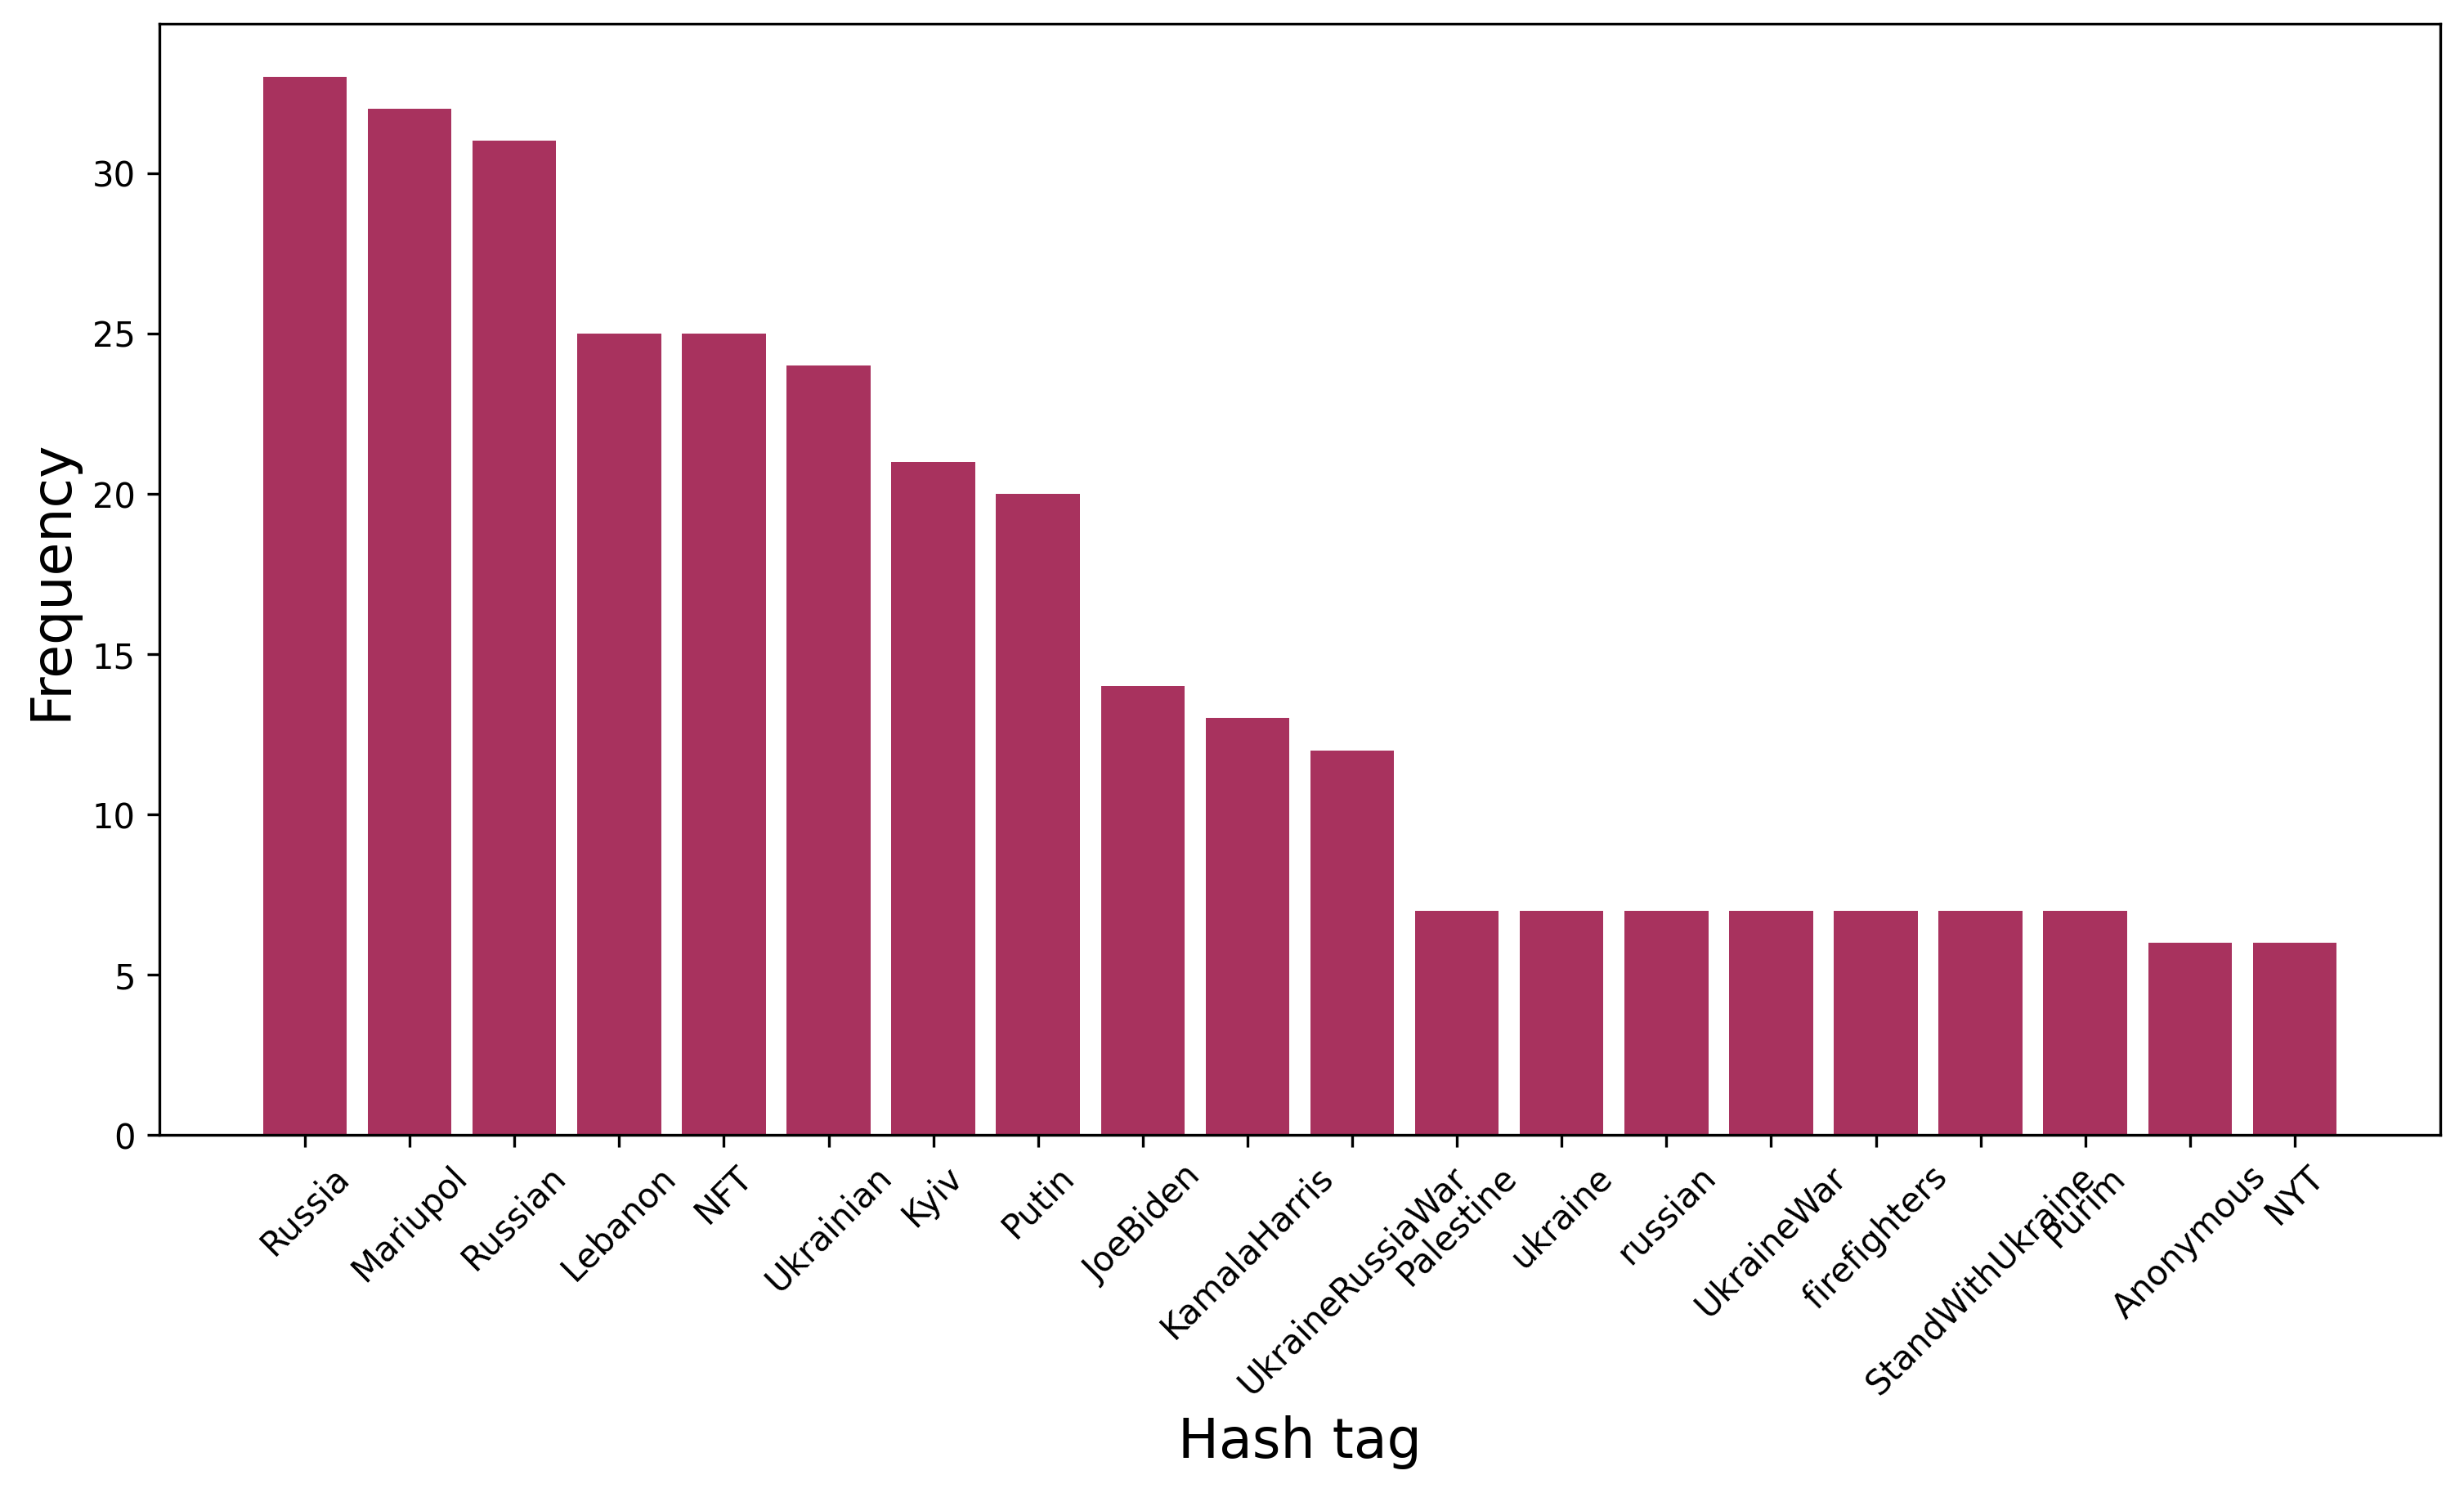

In [13]:
# %matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

fig = plt.figure( figsize=(12,6), dpi=300 )
ax = plt.axes()

ax.bar( df2['hash_tag'] , df2['count'] , color = '#a8325e' )

ax.set_xlabel('Hash tag', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)

plt.xticks(rotation=45)
plt.savefig('plot.svg')


## Exercise 2

Create a line chart to show the number of tweets per second (dictionary named ‘tps’)

* Title: ‘#Ukraine: tweets per second’
* X-axis label: ‘Time’
* Y-axis: ‘Number of tweets’
* Line style: '[solid](https://matplotlib.org/3.5.1/gallery/lines_bars_and_markers/linestyles.html)'
* Colour: ‘#930d08’
* Use plot style 'fivethirtyeight’ 
* Save the plot as ‘tweets.jpg’


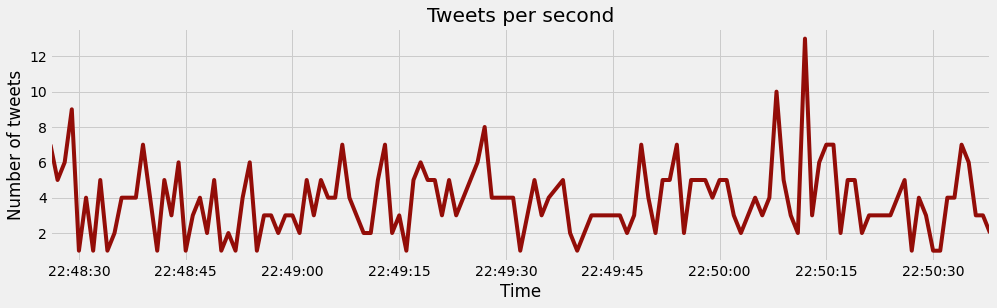

In [23]:


fig = plt.figure( figsize = ( 15, 4))
plt.style.use('fivethirtyeight')
ax = plt.axes()

ax.plot( tps['datetime'] , tps['id'] , color = '#930d08' , linestyle = 'solid')

ax.set_xlabel('Time')
ax.set_ylabel('Number of tweets')


ax.set_xlim( tps['datetime'].min() , tps['datetime'].max() )

ax.set_title( 'Tweets per second')

plt.savefig('tweets_per_second.svg')

## Exercise 3

Create a scatter plot to show the number of users mentioned and the number of likes

* Title: ‘#Ukraine: user mentions and likes’
* Colour: ‘#930d08’
* Use plot style ‘ggplot’ 
* Opacity: 0.3
* Size of the points: 50


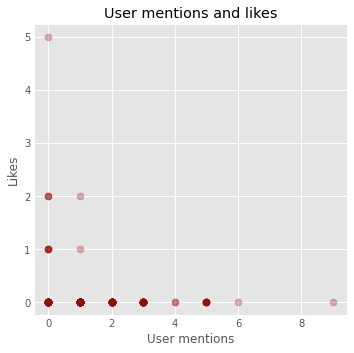

In [25]:

fig = plt.figure( figsize = ( 5, 5))
plt.style.use('ggplot')
ax = plt.axes()

ax.scatter( df['user_mentions'], df['likes'] , color = '#930d08' , s=50, alpha=0.3)

ax.set_xlabel('User mentions')
ax.set_ylabel('Likes')

ax.set_title( 'User mentions and likes')

plt.savefig('tweets_mentions_likes.svg')

## Exercise 4

Try to create the same scatterplot you had created for exercise 3 using Seaborn


In [26]:
import seaborn as sns

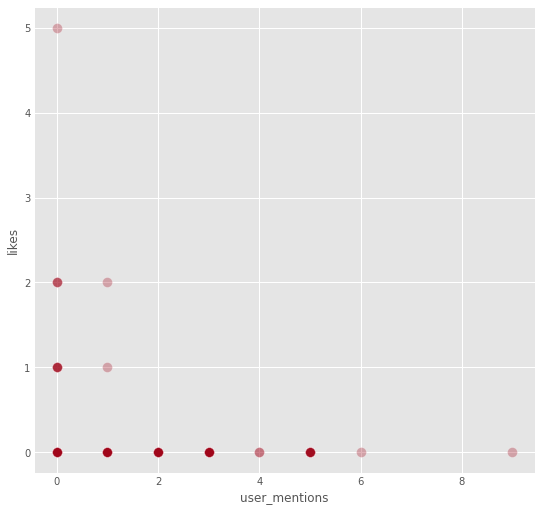

In [28]:
fig = plt.figure( figsize = ( 8,8 ))

ax = sns.scatterplot(x = 'user_mentions' , y = 'likes' , data = df , color = '#a0061a' , s = 100, alpha=0.3 ) 

plt.savefig('scatterplot.png')